In [11]:
import gymnasium as gym
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecMonitor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def make_env(env_id, rank, seed=0):
    def _init():
        env = gym.make(env_id)
        return env
    return _init

env_id = 'InvertedPendulum-v4'  # Replace with your MuJoCo environment
num_envs = 16  # Number of parallel environments

# Create the vectorized environment
env = SubprocVecEnv([make_env(env_id, i) for i in range(num_envs)])
print(env.seed())
env = VecMonitor(env)  # Optional: for monitoring and logging

model = SAC('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=1e5, log_interval=4, progress_bar=True)
model.save("sac_pendulum")

# del model # remove to demonstrate saving and loading



[1875246236, 1875246237, 1875246238, 1875246239, 1875246240, 1875246241, 1875246242, 1875246243, 1875246244, 1875246245, 1875246246, 1875246247, 1875246248, 1875246249, 1875246250, 1875246251]


Output()

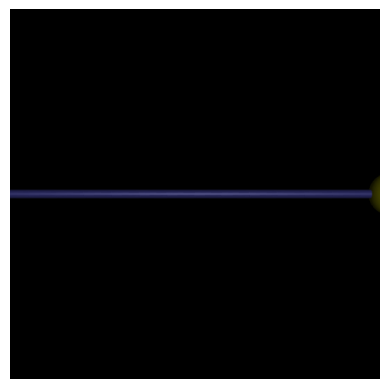

In [9]:
model = SAC.load("sac_pendulum")

env = gym.make("InvertedPendulum-v4", render_mode='rgb_array')
obs, info = env.reset()

data = []
while not (terminated or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    data.append([action, obs, reward])
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.axis('off')
    plt.show()

names = ["bthigh", "bshin", "bfoot", "fthigh", "fshin", "ffoot"]

P = pd.DataFrame(np.array(data), columns = names)

name = "bs422"
saveFile = "recordings/" + name
P.to_csv(saveFile + ".csv")

In [ ]:
model = SAC.load("sac_pendulum")

env = gym.make("InvertedPendulum-v4", render_mode='rgb_array')
obs, info = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.axis('off')
    plt.show()